# Heart disease prediction

* An attempt to build a machine learning model capable of predicting whether some has heart disease

## Data

* data is taken from UCI Machine Learning Repository

In [1]:
#importing libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# these are redular exploratory data analysis and plotting libraries

In [3]:
# importing models from scikit learn

from sklearn.linear_model import LogisticRegression

# trying to implement different machine learning models such as knn, random forest classifier etc.,

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
#for model evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split

In [8]:
# load data
# hd~heart disease

hd=pd.read_csv("heart disease.csv")

In [9]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
hd.shape

(303, 14)

In [12]:
# we have 303 rows and 14 columns
# let's do some visualizations to understand insights of the data

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# all the data is numeric.
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# lets check how many rows are there for each class
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
# let's check any missing values are there

hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

wow... no null values and all are in numeric.

*let's visualize

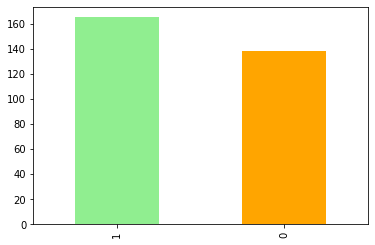

In [19]:
hd["target"].value_counts().plot(kind="bar",color=["lightgreen","orange"])

In [20]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


we can see the correlation between every column


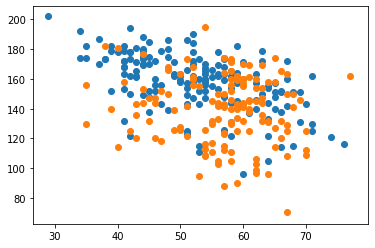

In [30]:
plt.scatter(hd.age[hd.target==1], hd.thalach[hd.target==1])
plt.scatter(hd.age[hd.target==0], hd.thalach[hd.target==0])

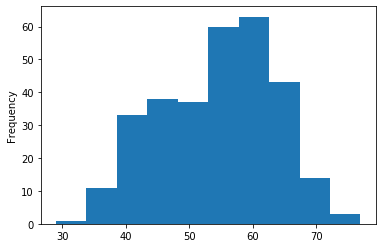

In [34]:
#lets see age 
hd.age.plot.hist()

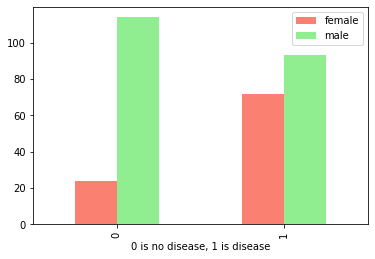

In [28]:
#lets get some insights from data
pd.crosstab(hd["target"],hd["sex"]).plot(kind="bar",
                                        color=["salmon","lightgreen"])
plt.xlabel("0 is no disease, 1 is disease")
plt.legend(["female","male"])

In [37]:
hd.cp # chest pain
# let's see how chest pain effects the target

pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


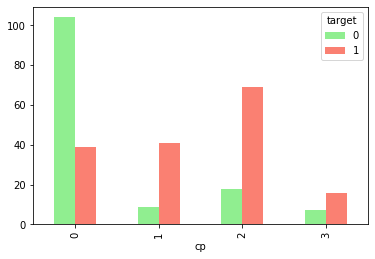

In [38]:
pd.crosstab(hd.cp, hd.target).plot(kind="bar",color=["lightgreen","salmon"])

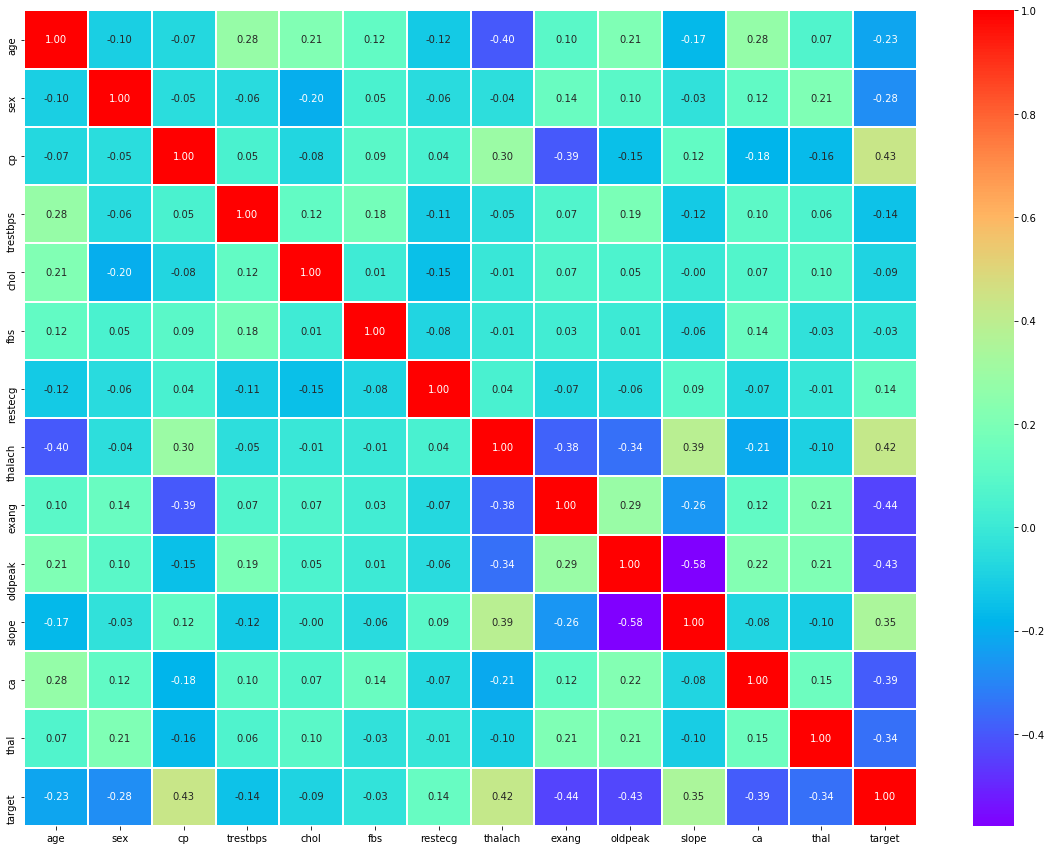

In [59]:
#lets plot a correlation matrix
cor_mat = hd.corr()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(cor_mat,
              annot=True,
              linewidths=1,
              fmt="0.2f",
              cmap="rainbow")

## colorful!

In [61]:
hd.shape

(303, 14)

we will have 13 features and 1 label

In [62]:
X = hd.drop("target", axis=1)

In [63]:
y = hd["target"]

In [109]:
#lets split our data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [110]:
# let's build our machine learning model and see which model perform better
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

In [111]:
models ={"logisticReggressor":model1,"KNN":model2,"RF":model3}

In [112]:
#let's create a function to train and evaluate
def train_test(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for key, model in models.items():
        model.fit(X_train,y_train)
        model_scores[key] = model.score(X_test,y_test)
    return model_scores

In [113]:
model_scores = train_test(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
model_scores

{'logisticReggressor': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RF': 0.8360655737704918}

In [115]:
modelscores = pd.DataFrame(model_scores, index=["accuracy"])

In [116]:
modelscores

,logisticReggressor,KNN,RF
accuracy,0.885246,0.688525,0.836066


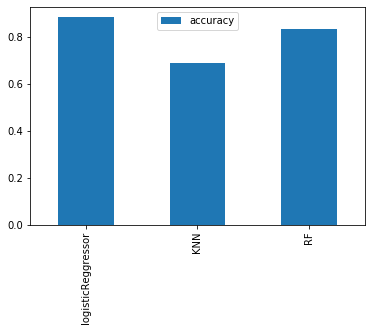

In [117]:
modelscores.T.plot(kind="bar")

In [118]:
#lets tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV

In [153]:
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2,20,2)}

In [159]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=10,
                          verbose=True)

In [160]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [161]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [162]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [163]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [165]:
y_preds = rs_log_reg.predict(X_test)

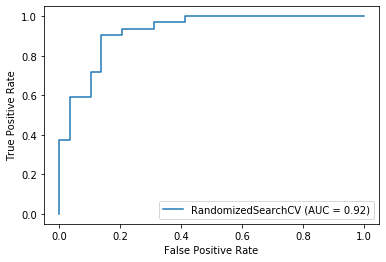

In [166]:
plot_roc_curve(rs_log_reg, X_test, y_test)

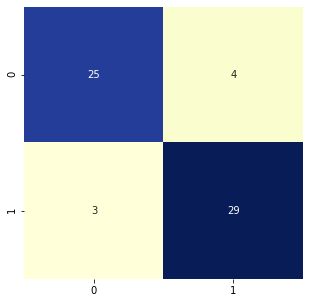

In [172]:
confusion_matrix(y_test, y_preds)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),
              annot=True,
              cbar=False,
              cmap="YlGnBu")


In [176]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [178]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [179]:
accuracy_score(y_test, y_preds)

0.8852459016393442

we got an accuracy of about 88.5% using logistic regression 

## let's use boosting algorithms and check if we can get higher accuracy

In [180]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [181]:
from xgboost import XGBClassifier


In [182]:
boost = XGBClassifier()

In [183]:
boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
boost.score(X_test,y_test)

0.819672131147541

**our logistic regression has outperformed

In [185]:
y_preds2 = boost.predict(X_test)

In [187]:
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [188]:
accuracy_score(y_test, y_preds2)

0.819672131147541

we got 81.96% accuracy using XGboost algorithm